In [1]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1

ERROR: Could not find a version that satisfies the requirement yfinance==0.1.67 (from versions: none)
ERROR: No matching distribution found for yfinance==0.1.67
'mamba' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [10]:
tesla_stock = yf.Ticker('TSLA')

In [11]:
tesla_data = tesla_stock.history(period="max")

- TSLA: No data found for this date range, symbol may be delisted


In [12]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

In [13]:
html_data = requests.get('https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue').text

ProxyError: HTTPSConnectionPool(host='www.macrotrends.net', port=443): Max retries exceeded with url: /stocks/charts/TSLA/tesla/revenue (Caused by ProxyError('Your proxy appears to only use HTTP and not HTTPS, try changing your proxy URL to be HTTP. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#https-proxy-error-http-proxy', SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1123)'))))

In [14]:
soup = BeautifulSoup(html_data,'html.parser')

NameError: name 'html_data' is not defined

In [15]:
tesla_revenue = pd.DataFrame(columns=['Date','Revenue'])
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({'Date':date,'Revenue':revenue}, ignore_index=True)
tesla_revenue

NameError: name 'soup' is not defined

In [16]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-16-2aef5327de36>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


In [17]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [18]:
tesla_revenue.tail()

Empty DataFrame
Columns: [Date, Revenue]
Index: []

In [19]:
GameStop = yf.Ticker('GME')

In [20]:
gme_data = GameStop.history(period='max')

- GME: No data found for this date range, symbol may be delisted


In [21]:
gme_data.reset_index(inplace=True)
gme_data.head()

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

In [22]:
html_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html').text

ProxyError: HTTPSConnectionPool(host='cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud', port=443): Max retries exceeded with url: /IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html (Caused by ProxyError('Your proxy appears to only use HTTP and not HTTPS, try changing your proxy URL to be HTTP. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#https-proxy-error-http-proxy', SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1123)'))))

In [23]:
soup = BeautifulSoup(html_data,'html.parser')

NameError: name 'html_data' is not defined

In [24]:
gme_revenue = pd.DataFrame(columns=['Date','Revenue'])
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    gme_revenue = tesla_revenue.append({'Date':date,'Revenue':revenue}, ignore_index=True)
gme_revenue
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

NameError: name 'soup' is not defined

In [25]:
gme_revenue.tail()

Empty DataFrame
Columns: [Date, Revenue]
Index: []

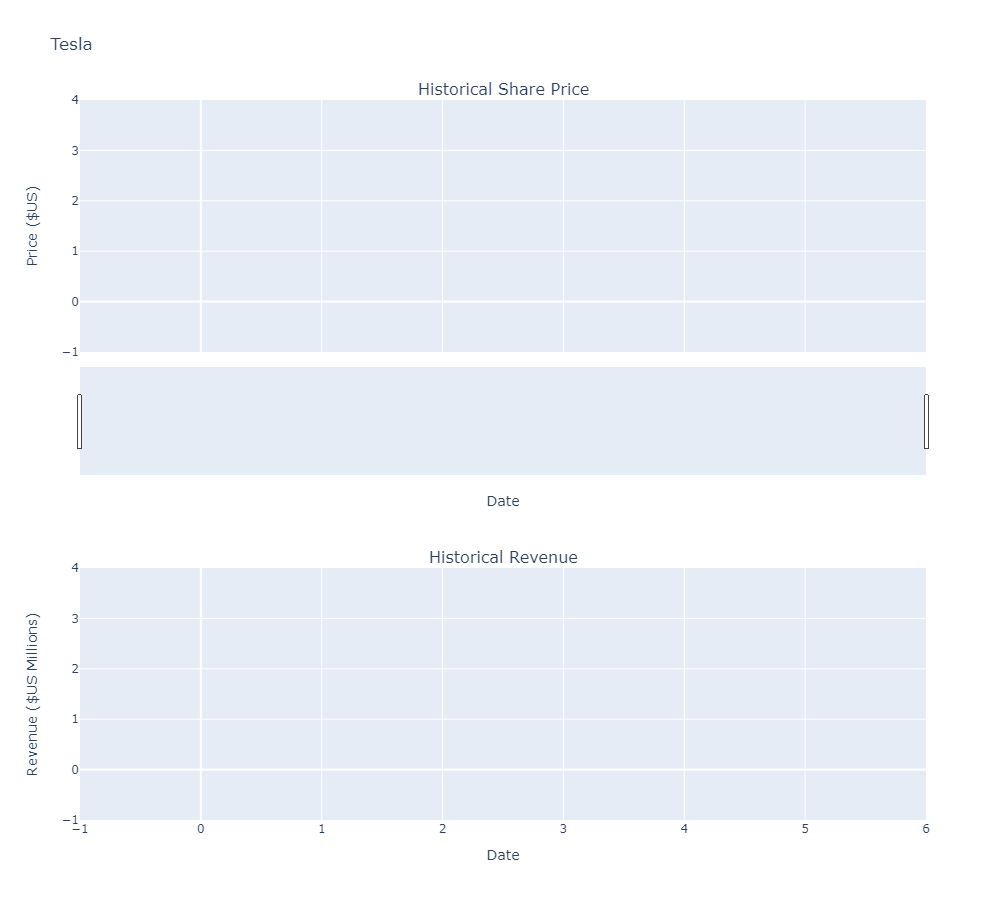

In [26]:
make_graph(tesla_data,tesla_revenue,'Tesla')

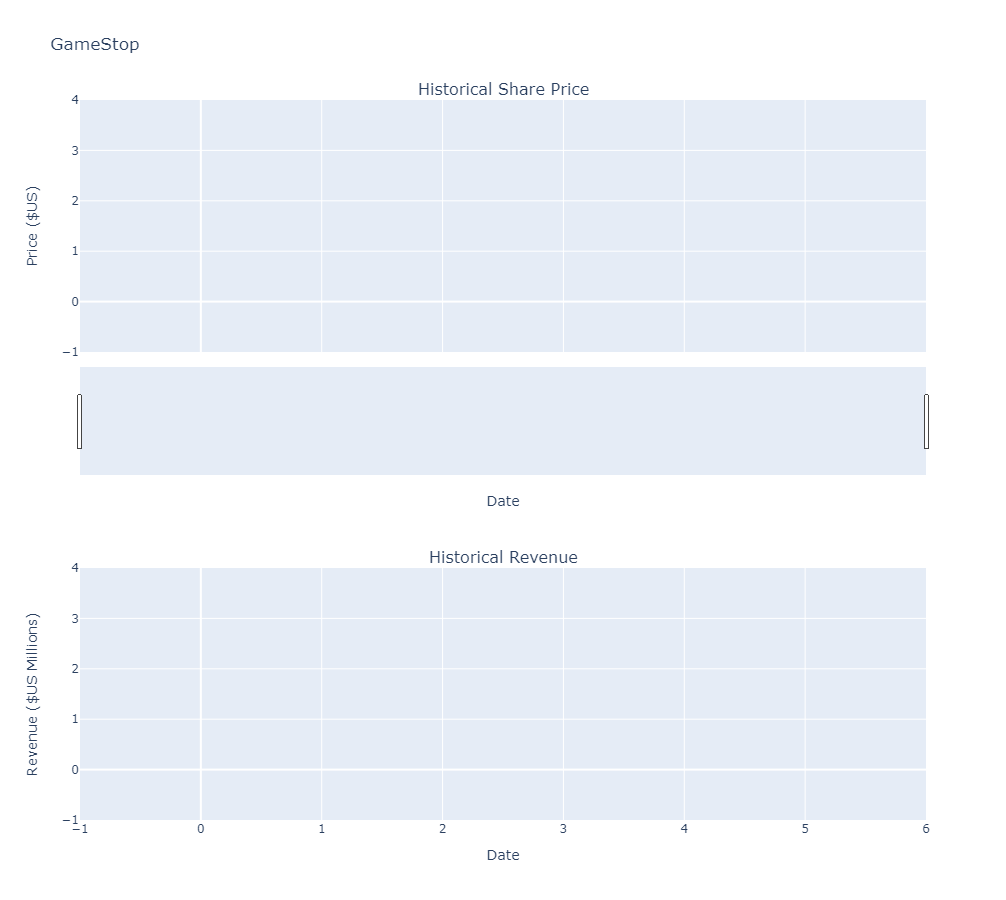

In [27]:
make_graph(gme_data, gme_revenue, 'GameStop')